<a href="https://www.kaggle.com/code/meeratif/covid-eda?scriptVersionId=96142912" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pandas
import seaborn as sns

In [2]:
covid_data = pandas.read_csv('../input/full-grouped/full_grouped.csv')

In [3]:
covid_data.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [4]:
covid_data.tail()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa
35155,2020-07-27,Zimbabwe,2704,36,542,2126,192,2,24,Africa


In [5]:
covid_data.info

<bound method DataFrame.info of              Date      Country/Region  Confirmed  Deaths  Recovered  Active  \
0      2020-01-22         Afghanistan          0       0          0       0   
1      2020-01-22             Albania          0       0          0       0   
2      2020-01-22             Algeria          0       0          0       0   
3      2020-01-22             Andorra          0       0          0       0   
4      2020-01-22              Angola          0       0          0       0   
...           ...                 ...        ...     ...        ...     ...   
35151  2020-07-27  West Bank and Gaza      10621      78       3752    6791   
35152  2020-07-27      Western Sahara         10       1          8       1   
35153  2020-07-27               Yemen       1691     483        833     375   
35154  2020-07-27              Zambia       4552     140       2815    1597   
35155  2020-07-27            Zimbabwe       2704      36        542    2126   

       New cases  N

In [6]:
covid_data.shape

(35156, 10)

In [7]:
covid_data.columns

Index(['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'WHO Region'],
      dtype='object')

In [8]:
covid_data.dtypes

Date              object
Country/Region    object
Confirmed          int64
Deaths             int64
Recovered          int64
Active             int64
New cases          int64
New deaths         int64
New recovered      int64
WHO Region        object
dtype: object

In [9]:
covid_data.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
count,3.515600e+04,35156.000000,3.515600e+04,3.515600e+04,35156.00000,35156.000000,35156.000000
mean,2.356663e+04,1234.068239,1.104813e+04,1.128443e+04,469.36375,18.603339,269.315593
std,1.499818e+05,7437.238354,6.454640e+04,8.997149e+04,3005.86754,115.706351,2068.063852
min,0.000000e+00,0.000000,0.000000e+00,-2.000000e+00,0.00000,-1918.000000,-16298.000000
25%,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000
50%,2.500000e+02,4.000000,3.300000e+01,8.500000e+01,2.00000,0.000000,0.000000
75%,3.640250e+03,78.250000,1.286250e+03,1.454000e+03,75.00000,1.000000,20.000000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,77255.00000,3887.000000,140050.000000


In [10]:
display(covid_data['Deaths'].isnull().value_counts())
display(covid_data['New cases'].isnull().value_counts())

False    35156
Name: Deaths, dtype: int64

False    35156
Name: New cases, dtype: int64

In [11]:
 def null_val():
    display((covid_data['Confirmed'] == 0).value_counts())
    display((covid_data['Deaths'] == 0).value_counts())
    display((covid_data['New recovered'] == 0).value_counts())
    display((covid_data['New cases'] == 0).value_counts())
    display((covid_data['New recovered'] == 0).value_counts())
    display((covid_data['New deaths'] == 0).value_counts())
null_val()

False    27138
True      8018
Name: Confirmed, dtype: int64

False    20941
True     14215
Name: Deaths, dtype: int64

True     20422
False    14734
Name: New recovered, dtype: int64

False    19686
True     15470
Name: New cases, dtype: int64

True     20422
False    14734
Name: New recovered, dtype: int64

True     24198
False    10958
Name: New deaths, dtype: int64

In [12]:
covid_data.isnull().sum()

Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Region        0
dtype: int64

In [13]:
not_null = covid_data[covid_data != 0]
not_null

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Mediterranean
1,2020-01-22,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe
2,2020-01-22,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa
3,2020-01-22,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe
4,2020-01-22,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa
...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621.0,78.0,3752.0,6791.0,152.0,2.0,NaN,Eastern Mediterranean
35152,2020-07-27,Western Sahara,10.0,1.0,8.0,1.0,NaN,NaN,NaN,Africa
35153,2020-07-27,Yemen,1691.0,483.0,833.0,375.0,10.0,4.0,36.0,Eastern Mediterranean
35154,2020-07-27,Zambia,4552.0,140.0,2815.0,1597.0,71.0,1.0,465.0,Africa


In [14]:
pd = pandas.DataFrame(covid_data.sum()[2:-1])
pd

,0
Confirmed,828508482
Deaths,43384903
Recovered,388408229
Active,396715350
New cases,16500952
New deaths,654019
New recovered,9468059


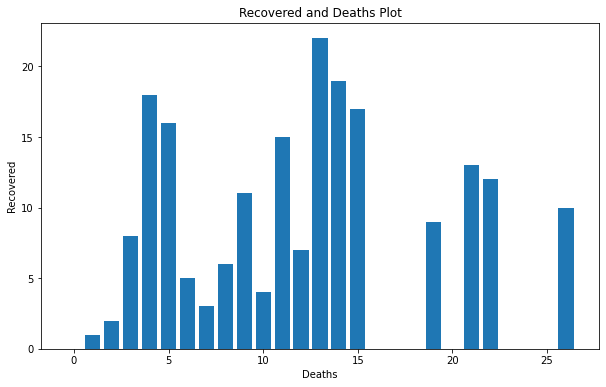

In [15]:

plt.figure(figsize=(10, 6))
plt.bar(covid_data['Deaths'].value_counts().keys()[0:20], covid_data['Recovered'].value_counts().keys()[0:20])
plt.title("Recovered and Deaths Plot")
plt.xlabel("Deaths")
plt.ylabel("Recovered")
plt.show()
    

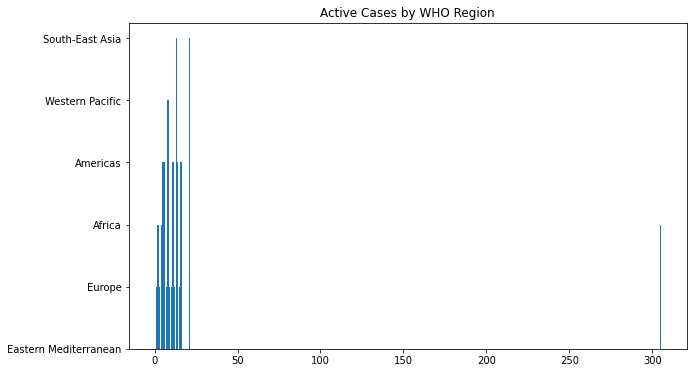

In [16]:
plt.figure(figsize=(10, 6))
plt.bar(covid_data['Active'].value_counts().keys()[0:20], covid_data['WHO Region'][0:20])
plt.title("Active Cases by WHO Region")
plt.show()

<Figure size 1080x648 with 0 Axes>

<AxesSubplot:>

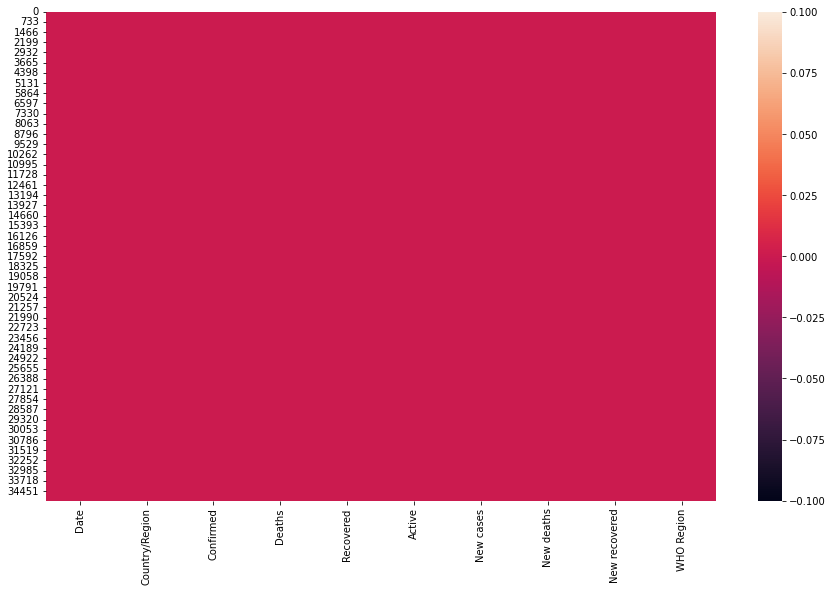

In [17]:
display(plt.figure(figsize=(15,9)))
display(sns.heatmap(covid_data.isnull()))

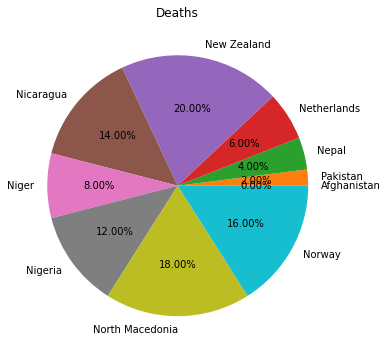

In [18]:
plt.figure(figsize=(10, 6))
plt.pie(list(covid_data['Deaths'].value_counts()[0:10].keys()), labels=list(covid_data['Country/Region'].value_counts()[0:10].keys()), autopct='%0.2f%%')
plt.title("Deaths")
plt.show()

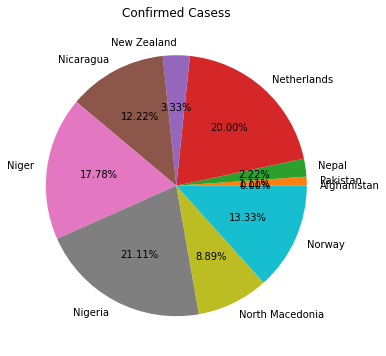

In [19]:
plt.figure(figsize=(10, 6))
plt.pie(list(covid_data['Confirmed'].value_counts()[0:10].keys()), labels=list(covid_data['Country/Region'].value_counts()[0:10].keys()), autopct='%0.2f%%')
plt.title("Confirmed Casess")
plt.show()

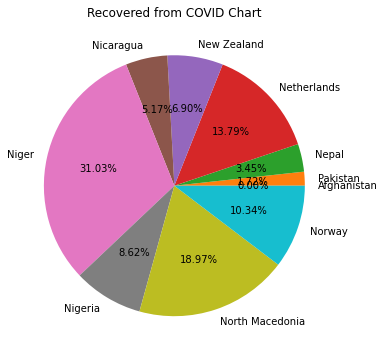

In [20]:
plt.figure(figsize=(10, 6))
plt.pie(list(covid_data['Recovered'].value_counts()[0:10].keys()), labels=list(covid_data['Country/Region'].value_counts()[0:10].keys()), autopct='%0.2f%%')
plt.title("Recovered from COVID Chart")
plt.show()

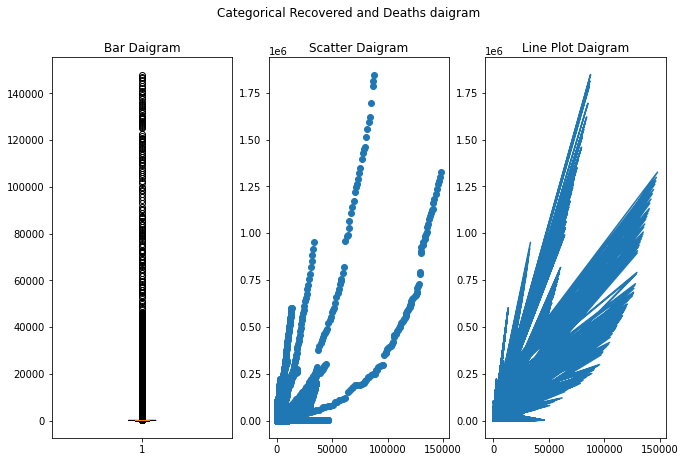

In [21]:
plt.figure(figsize=(11, 7))
plt.subplot(131)
plt.boxplot(list(covid_data['Deaths']), list(covid_data['Recovered']))
plt.title("Bar Daigram")
plt.subplot(132)
plt.scatter(list(covid_data['Deaths']), list(covid_data['Recovered']))
plt.title("Scatter Daigram")
plt.subplot(133)
plt.plot(list(covid_data['Deaths']), list(covid_data['Recovered']))
plt.title("Line Plot Daigram")
plt.suptitle("Categorical Recovered and Deaths daigram")
plt.show()